In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from playsound import playsound

In [3]:
SR = 16000


def get_spectrogram(x):

    frame_size = 4096  # 2のべき乗
    hamming_window = np.hamming(frame_size)  # フレームサイズに合わせてハミング窓を作成
    shift_size = SR / 100  # 0.01 秒 (10 msec)
    spectrogram = []

    for i in range(0, len(x) - frame_size, int(shift_size)):
        x_frame = x[i : i + frame_size]
        x_fft = np.log(np.abs(np.fft.rfft(x_frame * hamming_window)))
        spectrogram.append(x_fft)

    return np.array(spectrogram)

In [4]:
data_dir = "./data/"
x1, _ = librosa.load(data_dir + "aiueo.wav", sr=SR)
x2, _ = librosa.load(data_dir + "aiueo2.wav", sr=SR)
print(x1.shape, x2.shape)

(236000,) (236000,)


In [7]:
spectrogram = get_spectrogram(x1[:100000])
spectrogram.shape

(600, 2049)

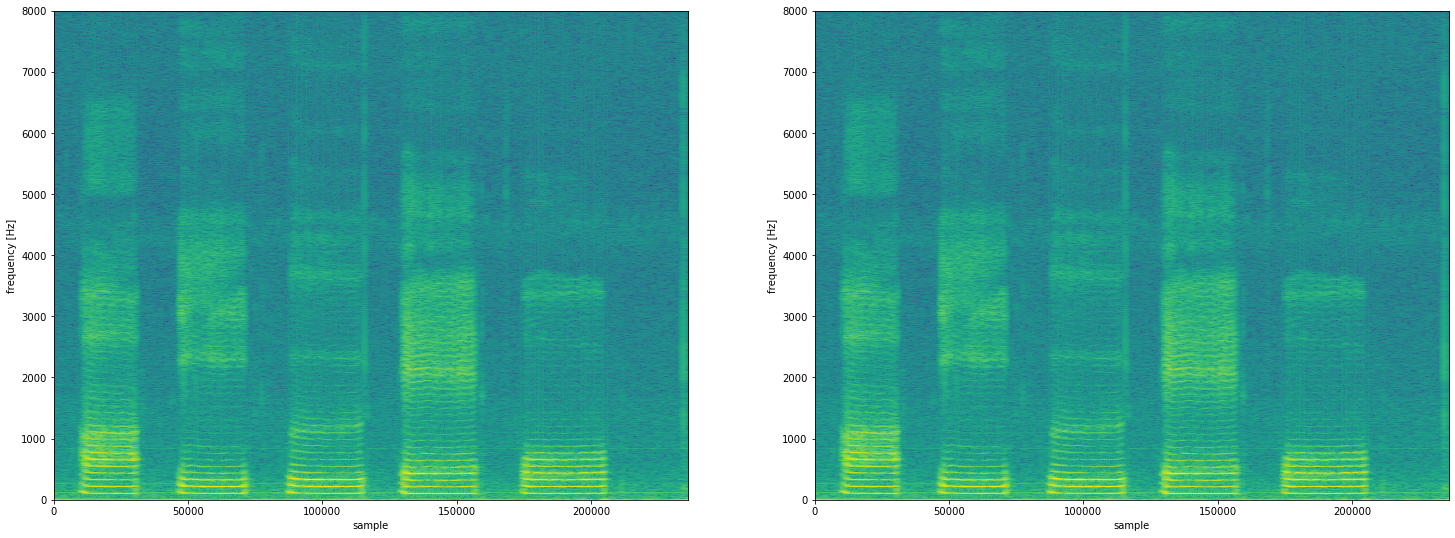

In [13]:
fig = plt.figure(figsize=(25, 9))

plt.subplot(121)
plt.xlabel("sample")
plt.ylabel("frequency [Hz]")
plt.imshow(
    np.flipud(spectrogram[:, :].T),
    extent=[0, len(x1), 0, SR / 2],
    aspect="auto",
    interpolation="nearest",
)

plt.subplot(122)
plt.xlabel("sample")
plt.ylabel("frequency [Hz]")
plt.imshow(
    np.flipud(spectrogram.T),
    extent=[0, len(x2), 0, SR / 2],
    aspect="auto",
    interpolation="nearest",
)
plt.show()

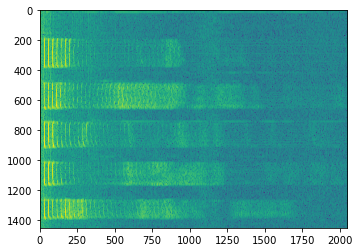

In [10]:
im = plt.imshow(
    np.flipud(spectrogram),
)

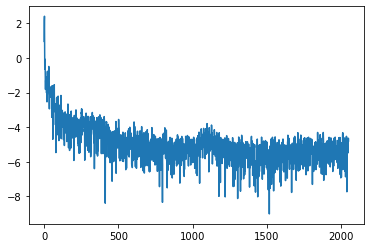

In [24]:
plt.plot(spectrogram[0])

[Text(0, 0, '-4000.0'),
 Text(0, 0, '0.0'),
 Text(0, 0, '4000.0'),
 Text(0, 0, '8000.0'),
 Text(0, 0, '12000.0'),
 Text(0, 0, '16000.0'),
 Text(0, 0, '20000.0')]

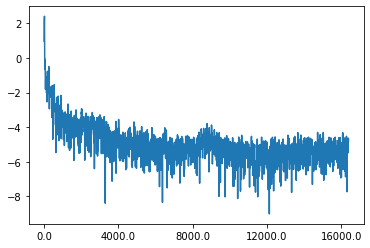

In [41]:
fig, ax = plt.subplots()
ax.plot(spectrogram[0])
xticks = ax.get_xticks()
ax.set_xticklabels(xticks * 8)